In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [10]:
df = pd.read_csv('shipping_data.csv')

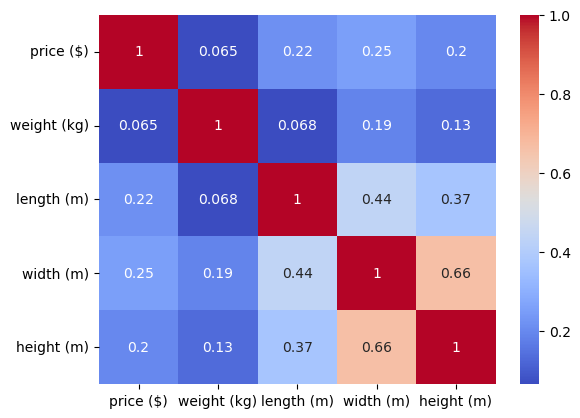

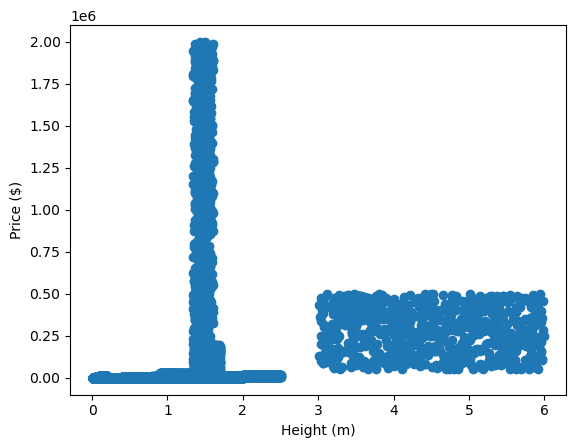

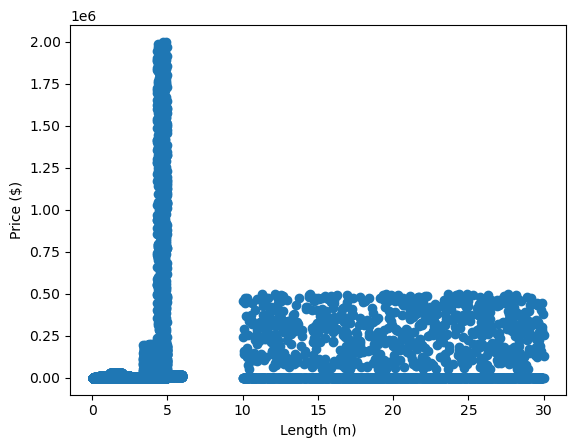

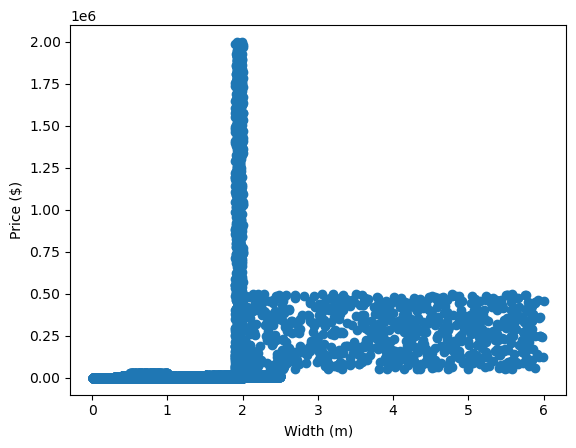

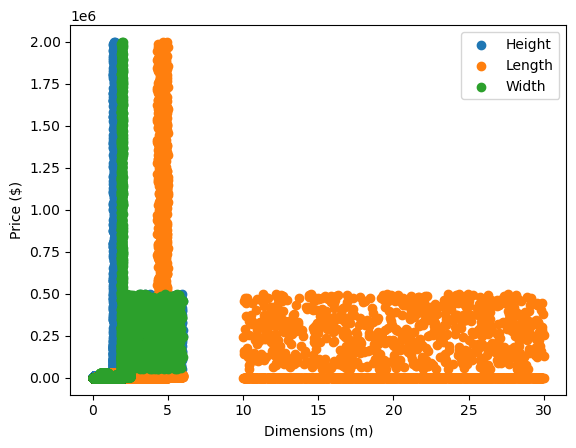

In [11]:
import seaborn as sns
cols = ['price ($)', 'weight (kg)', 'length (m)', 'width (m)', 'height (m)']
corr_matrix = df[cols].corr()
sns.heatmap(corr_matrix.iloc[:5,:5], annot=True, cmap='coolwarm')
plt.show()

plt.scatter(df['height (m)'], df['price ($)'])
plt.xlabel('Height (m)')
plt.ylabel('Price ($)')
plt.show()

plt.scatter(df['length (m)'], df['price ($)'])
plt.xlabel('Length (m)')
plt.ylabel('Price ($)')
plt.show()

plt.scatter(df['width (m)'], df['price ($)'])
plt.xlabel('Width (m)')
plt.ylabel('Price ($)')
plt.show()

fig, ax = plt.subplots()

ax.scatter(df['height (m)'], df['price ($)'], label='Height')
ax.scatter(df['length (m)'], df['price ($)'], label='Length')
ax.scatter(df['width (m)'], df['price ($)'], label='Width')

ax.set_xlabel('Dimensions (m)')
ax.set_ylabel('Price ($)')
ax.legend()

plt.show()

In [12]:
from sklearn.model_selection import train_test_split

df= df.dropna()
X = df[['height (m)', 'length (m)', 'width (m)']]
y = df['price ($)']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

NameError: name 'StandardScaler' is not defined

In [7]:
len(x_train.keys())
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    model.fit(x_train,y_train,epochs =20,batch_size=10,verbose=0)
    return model
model = build_model()
model.summary()

NameError: name 'x_train' is not defined

In [ ]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print('Loss:', loss)
print('MAE:', mae)
print('RMSE:', np.sqrt(mse))
print('R^2 score:', r2_score(y_test, y_pred))

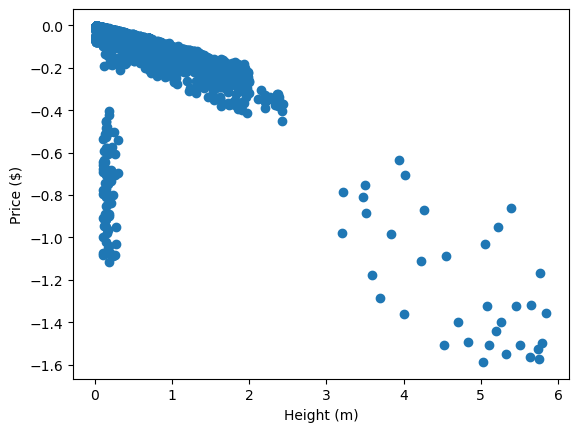

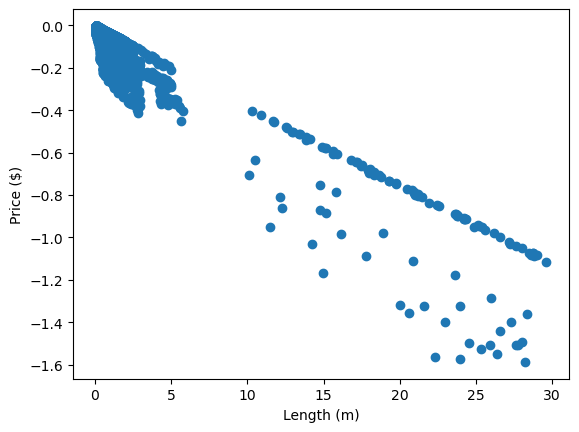

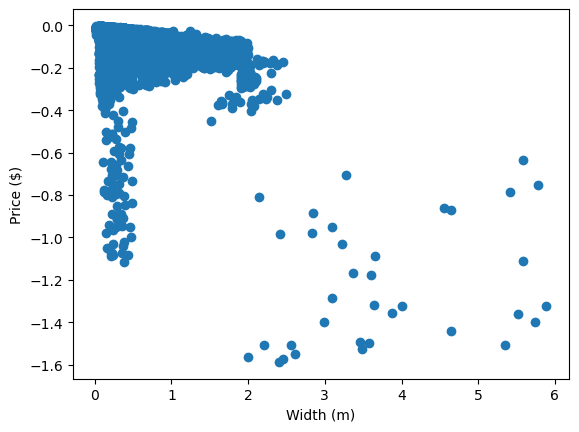

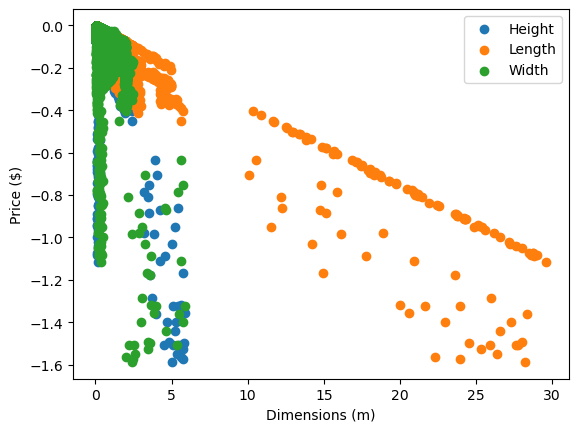

In [74]:
plt.scatter(x_test['height (m)'], y_pred)
plt.xlabel('Height (m)')
plt.ylabel('Price ($)')
plt.show()

plt.scatter(x_test['length (m)'], y_pred)
plt.xlabel('Length (m)')
plt.ylabel('Price ($)')
plt.show()

plt.scatter(x_test['width (m)'], y_pred)
plt.xlabel('Width (m)')
plt.ylabel('Price ($)')
plt.show()

fig, ax = plt.subplots()

ax.scatter(x_test['height (m)'],y_pred, label='Height')
ax.scatter(x_test['length (m)'], y_pred, label='Length')
ax.scatter(x_test['width (m)'],y_pred, label='Width')

ax.set_xlabel('Dimensions (m)')
ax.set_ylabel('Price ($)')
ax.legend()

plt.show()